<a href="https://colab.research.google.com/github/mohzary/python-deep-learning-f19/blob/master/M2ICP4/M2ICP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Simple CNN model for CIFAR-10
import tensorflow as tf 
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import load_model
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.constraints import maxnorm
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras import backend as K
K.set_image_data_format('channels_first')

Using TensorFlow backend.


In [ ]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [ ]:
# load data
(X_train1, y_train1), (X_test1, y_test1) = cifar10.load_data()

In [ ]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train1.astype('float32')
X_test = X_test1.astype('float32')
X_train = X_train1 / 255.0
X_test = X_test1 / 255.0

In [ ]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
num_classes

10

In [ ]:
# Create the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=X_train.shape[1:], kernel_constraint=maxnorm(3)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 16, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [ ]:
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = keras.optimizers.SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 16, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [ ]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7119 - accuracy: 0.3829 - val_loss: 1.4039 - val_accuracy: 0.4970
Epoch 2/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3672 - accuracy: 0.5090 - val_loss: 1.2202 - val_accuracy: 0.5655
Epoch 3/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2044 - accuracy: 0.5685 - val_loss: 1.1259 - val_accuracy: 0.5996
Epoch 4/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0893 - accuracy: 0.6143 - val_loss: 1.0683 - val_accuracy: 0.6237
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9903 - accuracy: 0.6487 - val_loss: 1.0240 - val_accuracy: 0.6354
Epoch 6/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9183 - accuracy: 0.6746 - val_loss: 0.9851 - val_accuracy: 0.6524
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8404 - accuracy: 0.6996 - val_loss: 0.9925 - val_accuracy:

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 69.41%


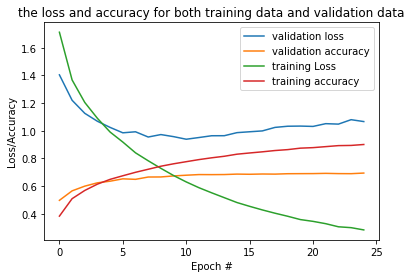

In [ ]:
plt.figure()
plt.plot(np.arange(0, 25), history.history["val_loss"], label="validation loss")
plt.plot(np.arange(0, 25), history.history["val_accuracy"], label="validation accuracy")
plt.plot(np.arange(0, 25), history.history["loss"], label="training Loss")
plt.plot(np.arange(0, 25), history.history["accuracy"], label="training accuracy")
plt.title("the loss and accuracy for both training data and validation data")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

In [ ]:
model.save('./model' + '.h5')

In [ ]:
model2 = tf.keras.models.load_model('model.h5')

In [ ]:
for img in range(0,4):
  predict_classe = model2.predict_classes(X_test[[img],:])
  print("predicted classe for image: {" + str(img) +"} is: " + str(predict_classe))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
predicted classe for image: {0} is: [3]
predicted classe for image: {1} is: [8]
predicted classe for image: {2} is: [8]
predicted classe for image: {3} is: [0]


In [ ]:
for img in range(0,4):
  print(y_test1[img])

[3]
[8]
[8]
[0]
